# Entrenamiento de un Modelo Random Forest con Selección de Características e Importancia

## Descripción del Proceso
Este notebook tiene como objetivo entrenar un modelo Random Forest utilizando una técnica de selección de características basada en la importancia de las mismas (feature importance) y abordar el desbalanceo de las etiquetas en el conjunto de datos.

### 1. Carga y Preparación de los Datos
- **Carga de datos**: Se lee los datos desde un archivo CSV. La primera columna contiene las características y la última columna contiene las etiquetas.
- **División de datos**: Se separa los datos en dos conjuntos: características (X) y etiquetas (y).

### 2. División de los Datos en Entrenamiento y Prueba
- **Split de los datos**: Se divide los datos en conjuntos de entrenamiento y prueba utilizando una proporción del 80% para entrenamiento y 20% para prueba.

### 3. Selección de Características
- **Carga de las caracteristicas preprocesadas**: Se cargan las caracteristicas hayadas en el preprocesamiento

### 4. Entrenamiento del Modelo Final
- **Filtrado de características**: Se filtra los datos de entrenamiento y prueba para que solo incluyan las características seleccionadas.
- **Modelo Random Forest con `class_weight='balanced'`**: Se entrena un modelo Random Forest final utilizando las características seleccionadas y se configura el parámetro `class_weight` a `'balanced'` para manejar el desbalanceo de las etiquetas.

### 5. Evaluación del Modelo
- **Predicciones y evaluación**: Se realizan predicciones en el conjunto de prueba y se evalúa el modelo utilizando métricas como la precisión, la exactitud, el recall y el F1-score. También se genera una matriz de confusión para visualizar el rendimiento del modelo.
- **Informe de resultados**: Se muestra un informe detallado de las métricas de evaluación.

### 6. Guardado del Modelo y las Características Seleccionadas
- **Guardar el modelo entrenado**: Se guarda el modelo entrenado en un archivo utilizando `joblib` para su uso futuro.

## Conclusión
En este notebook, se ha implementado un flujo completo para entrenar y evaluar un modelo Random Forest, incluyendo la selección de características basadas en su importancia y el manejo del desbalanceo de las etiquetas. Este enfoque mejora la eficiencia y precisión del modelo, garantizando que solo se utilicen las características más relevantes y se maneje adecuadamente el desbalanceo de los datos.

Precisión: 0.9999479501014973


['random_forest_model.pkl']

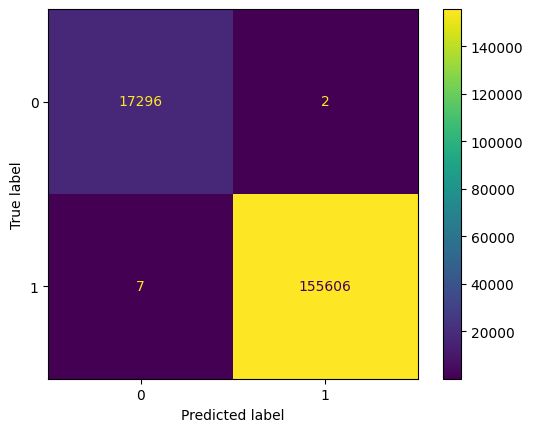

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
import joblib

# Cargar conjunto de datos preprocesado
df = pd.read_parquet('C:\\TFG_Javier_Jimenez\\DataSet_CIC-DDoS2019\\Parquet\\dataset_preprocessed.parquet')

# Dividir en características y etiquetas
X = df.drop(' Label', axis=1)
y = df[' Label']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cargar las características seleccionadas desde el archivo CSV
selected_features = pd.read_csv('selected_features.csv')['feature']

# Filtrar las características seleccionadas
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Entrenar el modelo final con las características seleccionadas y peso de clase 'balanced'
rf_final = RandomForestClassifier(class_weight='balanced', random_state=42, bootstrap=True)
rf_final.fit(X_train_selected, y_train)

# Evaluar el modelo
y_pred = rf_final.predict(X_test_selected)
classification_report(y_test, y_pred)
print("Precisión:", accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(rf_final, X_test_selected, y_test)

# Guardar el modelo
joblib.dump(rf_final, 'random_forest_model.pkl')


### ExplainerDashboard:  
#### Se crea un explainer para visualizar e interpretar el modelo Random Forest entrenado

In [1]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard

# Crear el explainer
explainer = ClassifierExplainer(rf_final, X_test_selected, y_test)

# Crear y ejecutar el dashboard con un límite en el número de índices en el menú desplegable
dashboard = ExplainerDashboard(explainer, title='Dashboard modelo Random Forest' , mode='dash', simple=True)
dashboard.run()

NameError: name 'rf_final' is not defined

Precisión: 0.999838066982436
Informe de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17298
           1       1.00      1.00      1.00    155613

    accuracy                           1.00    172911
   macro avg       1.00      1.00      1.00    172911
weighted avg       1.00      1.00      1.00    172911



['random_forest_model.pkl']

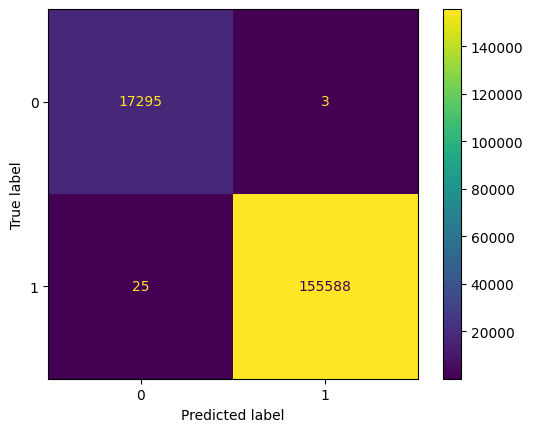

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
import joblib

# Cargar conjunto de datos preprocesado
df = pd.read_parquet('C:\\TFG_Javier_Jimenez\\DataSet_CIC-DDoS2019\\Parquet\\dataset_preprocessed.parquet')

# Dividir en características y etiquetas
X = df.drop(' Label', axis=1)
y = df[' Label']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cargar las características seleccionadas desde el archivo CSV
selected_features = pd.read_csv('selected_features.csv')['feature']

# Filtrar las características seleccionadas
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Entrenar el modelo final con las características seleccionadas y técnicas para controlar el sobreajuste
rf_final = RandomForestClassifier(
    n_estimators=200,          # Número de árboles
    max_depth=10,              # Profundidad máxima de los árboles
    min_samples_split=10,      # Número mínimo de muestras por división
    min_samples_leaf=5,        # Número mínimo de muestras por hoja
    class_weight='balanced',   # Ajuste de peso de clase
    random_state=42,
    bootstrap=True
)
rf_final.fit(X_train_selected, y_train)

# Evaluar el modelo
y_pred = rf_final.predict(X_test_selected)
print("Precisión:", accuracy_score(y_test, y_pred))
print("Informe de Clasificación:")
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_estimator(rf_final, X_test_selected, y_test)

# Guardar el modelo
joblib.dump(rf_final, 'random_forest_model.pkl')
